# CMRG HG002
This notebook generates Figure 3 of the manuscript

In [37]:
import pandas as pd
import numpy as np
import os

In [38]:
sample_list = ['HG002_CMRG']
platforms_dict = {'ultima':'HG002_CMRG_Ultima_30X_all_stratifications_v3.6', 'illumina':'HG002_CMRG_Illumina_happy_all_stratifications_v3.6'}

In [39]:
basedir = '/data/lsantuari/sequencing-data/HG002/CMRG_analysis/GA4GH_v3.6'
platform = 'illumina'
platform_dir = platforms_dict[platform]
sample = sample_list[0]

In [ ]:
df_list = []

exclude = ['_AT_', '_GC_']

pattern = '|'.join(exclude)

fields_to_select = ['Type','Subset','QUERY.TP','QUERY.FP','TRUTH.FN','QUERY.TOTAL','QUERY.UNK','METRIC.Precision','METRIC.Recall', 'METRIC.F1_Score']

for platform in platforms_dict.keys():
    for sample in sample_list:

        platform_dir = platforms_dict[platform]
        
        happy_df = pd.read_csv(os.path.join(basedir,platform_dir,platform_dir+'.extended.csv'), sep=',')
        
        happy_hpol = happy_df[
            (happy_df['Filter'] == 'PASS') &
            (happy_df['Subtype'] == '*') &
            (happy_df['Subset'].str.contains('homopolymer')) &
            (~happy_df['Subset'].str.contains(pattern, case=False, na=False))
        ][fields_to_select]
        
        happy_all = happy_df[
            (happy_df['Filter'] == 'PASS') &
            (happy_df['Subtype'] == '*') &
            (happy_df['Subset'] == '*')
        ][fields_to_select]
        
        df_to_save = pd.concat([happy_all, happy_hpol])
        df_to_save['platform'] = platform
        df_to_save['sample'] = sample
        df_list.append(df_to_save)

res = pd.concat(df_list)

subset_dict = {
    '*': 'All',
    'SimpleRepeat_homopolymer_4to6_slop5': 'hpol_4to6',
    'SimpleRepeat_homopolymer_7to11_slop5': 'hpol_7to11',
    'SimpleRepeat_homopolymer_ge12_slop5': 'hpol_12to20', # the CMRG benchmark excludes homopolymers >20bp
    'SimpleRepeat_homopolymer_ge21_slop5': 'hpol_gt20'
}

res['Subset'] = res['Subset'].replace(subset_dict)
res

,Type,Subset,QUERY.TP,QUERY.FP,TRUTH.FN,QUERY.TOTAL,QUERY.UNK,METRIC.Precision,METRIC.Recall,METRIC.F1_Score,platform,sample
1,INDEL,All,2762,554,1032,747068,743752,0.832931,0.715624,0.769835,ultima,HG002_CMRG
3841,SNP,All,16587,188,950,3783963,3767188,0.988793,0.946032,0.966940,ultima,HG002_CMRG
225,INDEL,hpol_4to6,721,79,200,190500,189700,0.901250,0.775281,0.833533,ultima,HG002_CMRG
231,INDEL,hpol_7to11,448,73,94,136281,135760,0.859885,0.822306,0.840676,ultima,HG002_CMRG
237,INDEL,hpol_12to20,396,412,699,174651,173843,0.490099,0.347948,0.406967,ultima,HG002_CMRG
243,INDEL,hpol_gt20,1,0,1,11515,11514,1.000000,0.500000,0.666667,ultima,HG002_CMRG
4065,SNP,hpol_4to6,4026,55,286,933106,929025,0.986523,0.934010,0.959549,ultima,HG002_CMRG
4071,SNP,hpol_7to11,366,17,40,90806,90423,0.955614,0.903382,0.928764,ultima,HG002_CMRG
4077,SNP,hpol_12to20,120,21,46,35550,35409,0.851064,0.727811,0.784626,ultima,HG002_CMRG
4083,SNP,hpol_gt20,0,0,0,8008,8008,NaN,0.000000,NaN,ultima,HG002_CMRG


In [ ]:
df_long = (
    res
    .melt(
        id_vars=["platform","sample","Type","Subset",
                 "QUERY.TP","QUERY.FP","TRUTH.FN","QUERY.TOTAL","QUERY.UNK"],
        value_vars=["METRIC.Precision","METRIC.Recall","METRIC.F1_Score"],
        var_name="metric",
        value_name="value"
    )
)

# Extract suffix
df_long["metric"] = df_long["metric"].str.split(".", n=1).str[1]

df_long = df_long[df_long['Subset'] != 'hpol_gt20']

df_long['Type'] = df_long['Type'].replace({'SNP':'SNVs', 'INDEL':'Indels'})

print(df_long.head())

  platform      sample    Type       Subset  QUERY.TP  QUERY.FP  TRUTH.FN  \
0   ultima  HG002_CMRG  Indels          All      2762       554      1032   
1   ultima  HG002_CMRG    SNVs          All     16587       188       950   
2   ultima  HG002_CMRG  Indels    hpol_4to6       721        79       200   
3   ultima  HG002_CMRG  Indels   hpol_7to11       448        73        94   
4   ultima  HG002_CMRG  Indels  hpol_12to20       396       412       699   

   QUERY.TOTAL  QUERY.UNK     metric     value  
0       747068     743752  Precision  0.832931  
1      3783963    3767188  Precision  0.988793  
2       190500     189700  Precision  0.901250  
3       136281     135760  Precision  0.859885  
4       174651     173843  Precision  0.490099  


In [42]:
df_long

,platform,sample,Type,Subset,QUERY.TP,QUERY.FP,TRUTH.FN,QUERY.TOTAL,QUERY.UNK,metric,value
0,ultima,HG002_CMRG,Indels,All,2762,554,1032,747068,743752,Precision,0.832931
1,ultima,HG002_CMRG,SNVs,All,16587,188,950,3783963,3767188,Precision,0.988793
2,ultima,HG002_CMRG,Indels,hpol_4to6,721,79,200,190500,189700,Precision,0.901250
3,ultima,HG002_CMRG,Indels,hpol_7to11,448,73,94,136281,135760,Precision,0.859885
4,ultima,HG002_CMRG,Indels,hpol_12to20,396,412,699,174651,173843,Precision,0.490099
6,ultima,HG002_CMRG,SNVs,hpol_4to6,4026,55,286,933106,929025,Precision,0.986523
7,ultima,HG002_CMRG,SNVs,hpol_7to11,366,17,40,90806,90423,Precision,0.955614
8,ultima,HG002_CMRG,SNVs,hpol_12to20,120,21,46,35550,35409,Precision,0.851064
10,illumina,HG002_CMRG,Indels,All,3688,96,177,978358,974574,Precision,0.974630
11,illumina,HG002_CMRG,SNVs,All,17084,128,409,3921601,3904389,Precision,0.992563


In [ ]:
df_stats = df_long[['platform', 'Type', 'Subset', 'metric', 'value']].copy()

df_stats = df_stats.apply(lambda x: np.floor(x * 1000) / 1000 if np.issubdtype(x.dtype, np.number) else x)

outfile = f"H2030GC_HG002_CMRG_stats.csv"
df_stats.to_csv(outfile, sep=',')

In [44]:
df_stats

,platform,Type,Subset,metric,value
0,ultima,Indels,All,Precision,0.832
1,ultima,SNVs,All,Precision,0.988
2,ultima,Indels,hpol_4to6,Precision,0.901
3,ultima,Indels,hpol_7to11,Precision,0.859
4,ultima,Indels,hpol_12to20,Precision,0.490
6,ultima,SNVs,hpol_4to6,Precision,0.986
7,ultima,SNVs,hpol_7to11,Precision,0.955
8,ultima,SNVs,hpol_12to20,Precision,0.851
10,illumina,Indels,All,Precision,0.974
11,illumina,SNVs,All,Precision,0.992


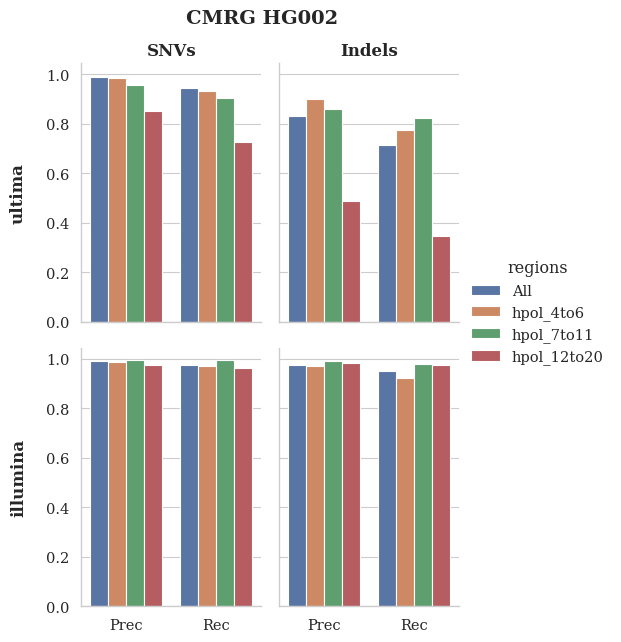

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_long[df_long["metric"].isin(["Precision", "Recall"])].copy()
df_plot.loc[:, "metric"] = df_plot["metric"].replace({"Precision": "Prec", "Recall": "Rec"})

df_plot = df_plot.rename(columns={"Subset": "regions"})

sns.set_theme(
    style="whitegrid",
    context="paper",
    font="serif",
    font_scale=1.2
)

fig_width = 3.3
fig_height = 3.3 * len(df_plot["platform"].unique())  # scale by number of rows

g = sns.catplot(
    data=df_plot,
    x="metric",
    y="value",
    hue="regions",
    row="platform",
    col="Type",
    kind="bar",
    height=fig_height / len(df_plot["platform"].unique()),
    aspect=fig_width / fig_height,
    dodge=True,
    legend="full",
    col_order=['SNVs', 'Indels']
)

g._legend.set_bbox_to_anchor((1.3, 0.5)) 

# Clean axis labels
g.set_xlabels("")
g.set_ylabels("")

# Remove default facet titles
for ax in g.axes.flat:
    ax.set_title("")

# Set column titles only on top row
for col_idx, col_name in enumerate(g.col_names):
    g.axes[0, col_idx].set_title(col_name, fontsize=12, fontweight="bold")

# Set row titles on left side
for row_idx, row_name in enumerate(g.row_names):
    g.axes[row_idx, 0].annotate(
        row_name,
        xy=(-0.3, 0.5), xycoords="axes fraction",
        ha="right", va="center",
        fontsize=12, fontweight="bold", rotation=90
    )

# Main title
g.fig.subplots_adjust(top=0.7, left=0.25, right=0.95, hspace=0.3, wspace=0.2)

g.fig.suptitle("CMRG HG002",
               fontsize=14, fontweight="bold",
               x=0.55, y=0.97)

plt.tight_layout()

# Save as high-resolution EPS
outfilename = f"H2030GC_HG002_CMRG"

plt.savefig(outfilename + ".eps", format="eps", bbox_inches="tight", dpi=600)

plt.show()